## Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha
* Ver los fin de semanas
* Cuantos días pasaron desde el ultimo feriado y cuanto falta para el siguiente (?)
* Ver outliers en los feriados (o en los días)
* Maximos y minimos en los user_activities
* Diferenciar por pais

## Rohlik Orders Forecasting Challenge

### Contexto de la Competencia:

En el marco de la competencia **"Rohlik Orders Forecasting Challenge"**, organizada por Rohlik Group, se nos plantea el desafío de predecir el número de pedidos diarios que serán realizados en varios almacenes distribuidos en Europa durante un período de 60 días. Esta iniciativa tiene como objetivo principal optimizar la gestión operativa de uno de los líderes europeos en el sector de la distribución de alimentos en línea.

Rohlik Group, presente en países como República Checa, Alemania, Austria, Hungría y Rumania, opera 11 almacenes estratégicos. La precisión en la predicción de pedidos es crucial para el éxito de sus operaciones, ya que influye directamente en la asignación de personal, la logística de entregas, el manejo de inventarios y la eficiencia general de la cadena de suministro. Una gestión optimizada no solo mejora el servicio al cliente, sino que también contribuye a reducir el desperdicio y a promover un futuro más sostenible.


### Explicación de las bibliotecas utilizadas en el trabajo práctico

Para abordar el análisis y modelado de datos en este trabajo práctico, se han utilizado diversas bibliotecas de Python, cada una con funcionalidades específicas que contribuyen a diferentes etapas del proyecto. A continuación, se describen brevemente las bibliotecas incluidas y su propósito:

#### **Bibliotecas generales**
- **`pandas`**: Esencial para la manipulación y análisis de datos estructurados en formato tabular. Permite realizar operaciones como limpieza de datos, transformación de variables y exploración inicial.
- **`numpy`**: Ofrece herramientas para realizar operaciones matemáticas y de álgebra lineal de forma eficiente, indispensables para la manipulación de arrays y cálculos numéricos avanzados.

#### **Visualización de datos**
- **`matplotlib.pyplot`**: Herramienta básica para la creación de gráficos 2D, utilizada para visualizar patrones en los datos.
- **`seaborn`**: Extiende las capacidades de visualización de `matplotlib`, facilitando la creación de gráficos estadísticos atractivos y funcionales.

#### **Modelado y evaluación**
- **`scikit-learn`**:
  - **Preprocesamiento**: Herramientas como `StandardScaler` y `MinMaxScaler` se utilizan para escalar y normalizar variables, mientras que `OneHotEncoder` y `LabelEncoder` manejan variables categóricas.
  - **Modelos base**: Incluye algoritmos como `DecisionTreeRegressor`, `SVR` y `LinearRegression`, utilizados como modelos de referencia.
  - **Modelos avanzados**: Soporta métodos de ensamble como `RandomForestRegressor`, `GradientBoostingRegressor`, y meta-modelos como `StackingRegressor` para mejorar el rendimiento.
  - **Validación cruzada y búsqueda de hiperparámetros**: Proporciona técnicas como `KFold`, `GridSearchCV` y `RandomizedSearchCV` para evaluar y optimizar modelos de manera sistemática.
  - **Métricas**: Herramientas como `mean_squared_error` y `mean_absolute_percentage_error` permiten evaluar el desempeño de los modelos.

#### **Modelos de aprendizaje automático avanzado**
- **`XGBoost`, `LightGBM` y `CatBoost`**: Algoritmos de gradiente boosting altamente eficientes y rápidos, ideales para el modelado de datos tabulares con alto desempeño en competiciones.
- **`keras`**: Utilizado para implementar redes neuronales artificiales, con herramientas para construir modelos `Sequential` y capas como `Dense` para tareas de regresión.

#### **Otros recursos**
- **`datetime`**: Manejo de fechas y tiempos, útil para manipular variables temporales en los datos.
- **Configuración adicional (`pd.set_option`)**: Configura la visualización de datos en tablas extensas para facilitar su inspección.

#### **Por qué son importantes**
El uso combinado de estas bibliotecas permite cubrir todas las etapas del pipeline de ciencia de datos: desde la exploración y preprocesamiento de datos hasta la implementación y evaluación de modelos avanzados. Cada herramienta está optimizada para una tarea específica, garantizando un flujo de trabajo eficiente y resultados robustos.


## Carga de librerías

In [226]:
# Probar con arbol con poda
# Probar con arbol sin poda pero corto
# Probar voting
# Probar varios KFolds en el de stacking

#Agregamos librerias a utilizar
import keras as keras
import pandas as pd
import xgboost as xgb
# import sklearn as sk
import numpy as np
from datetime import datetime

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#modelos y métricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split, cross_validate
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import StackingRegressor,RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
pd.set_option('display.max_columns', 40)

# import warnings
# warnings.simplefilter("ignore")

## Visualización de datos del Dataset Original

En esta sección realizamos varias visualizaciones con el objetivo de explorar y comprender mejor las características del dataset, identificando patrones y posibles variables que podrían ser útiles para la predicción de pedidos.

Primero, analizamos la distribución de las órdenes por día utilizando un **boxplot** que nos permitió observar la variabilidad y detectar valores atípicos en la cantidad de órdenes diarias. Esta visualización es útil para entender si existen días con un número de pedidos inusualmente alto o bajo, lo que podría afectar la modelización.

A continuación, examinamos las variables categóricas como **`warehouse`** y **`shops_closed`**. La variable `warehouse` nos permitió ver la distribución de las muestras entre los diferentes almacenes, mientras que `shops_closed` nos mostró cuántos días las tiendas estuvieron cerradas. Este análisis es relevante porque la cantidad de días con tiendas cerradas podría influir en la predicción de pedidos, pero también nos permite filtrar información que no aporta significativamente al modelo.

Finalmente, nos centramos en un análisis específico del almacén **`Frankfurt_1`**, donde observamos que de las 7340 muestras disponibles, solo dos tenían un valor positivo en la columna `frankfurt_shutdown`. Esto indica que esta variable tiene poca variabilidad y es probable que no tenga un impacto significativo en la predicción de las órdenes, por lo que podríamos considerarla de poca utilidad para el entrenamiento de los modelos.

Estas visualizaciones nos ayudaron a identificar las variables clave que podrían tener un mayor impacto en las predicciones, así como a descartar aquellas que no aportan valor relevante para el modelo.


In [227]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [228]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [229]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


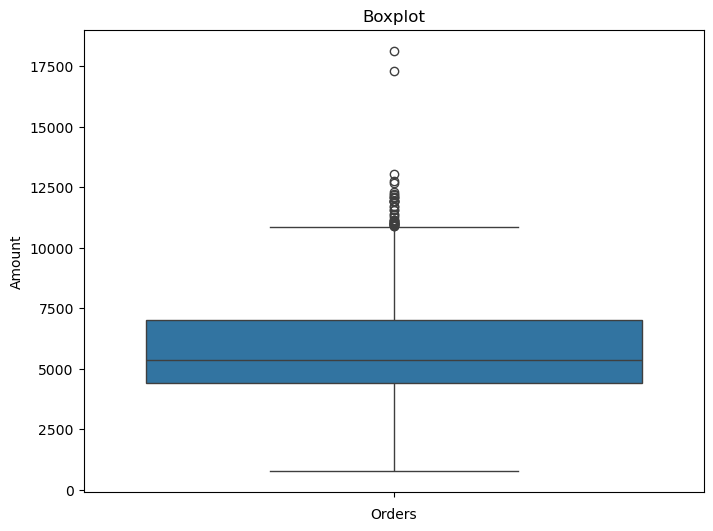

In [230]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [231]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [232]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [233]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [234]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [235]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

## Limpieza y preparación del dataset

Para obtener información más precisa y útil de los datos disponibles, hemos realizado varias modificaciones al dataset que nos permitirán estudiarlo de manera más efectiva y entrenar modelos con un conjunto de datos más adecuado.

### Dataset limpio
Una de las primeras modificaciones fue eliminar aquellas variables que no se encuentran en el conjunto de test. Esto es importante porque necesitamos asegurarnos de que los modelos se entrenen solo con las variables que estarán disponibles durante la predicción. Así, eliminamos columnas como `shutdown`, `mini_shutdown`, `frankfurt_shutdown`, `precipitation`, `snow`, `user_activity_1`, `user_activity_2`, `blackout`, `mov_change` e `id`, ya que estas no están presentes en el dataset de test. Eliminando estas variables, creamos un dataset más alineado con los datos con los que se evaluarán los modelos.

Además, para centrarnos en las variables numéricas, eliminamos las columnas no numéricas como `warehouse`, `date` y `holiday_name`. Esto nos dejó con un conjunto de datos numéricos que podemos usar para entrenar los modelos.

### Dataset de (no) feriados
Otro cambio relevante fue la distinción entre los días que son feriados o no. Esta variable puede influir considerablemente en la predicción de pedidos, ya que la demanda puede variar durante los días festivos. Sin embargo, para este análisis inicial, decidimos centrarnos en las variables numéricas, separando así los días feriados sin incluir la columna en la parte numérica del dataset.

### Visualización de correlaciones
Para comprender mejor las relaciones entre las variables numéricas y seleccionar aquellas que tienen mayor impacto en las predicciones, creamos un **heatmap de correlaciones**. Esta visualización nos permitió ver cómo se relacionan las diferentes variables entre sí, ayudándonos a identificar posibles redundancias o relaciones fuertes que podrían ser útiles en el modelado.

### Boxplots
Finalmente, para evaluar la distribución de las variables numéricas, mostramos **boxplots**. Estos gráficos nos permitieron observar la dispersión de los datos y detectar posibles valores atípicos (outliers), los cuales podrían afectar la precisión de los modelos predictivos.

Con estas modificaciones y visualizaciones, hemos preparado un dataset más limpio y adecuado para realizar predicciones más precisas, eliminando variables irrelevantes y destacando las que son importantes para el análisis.


In [236]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change", "id"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0


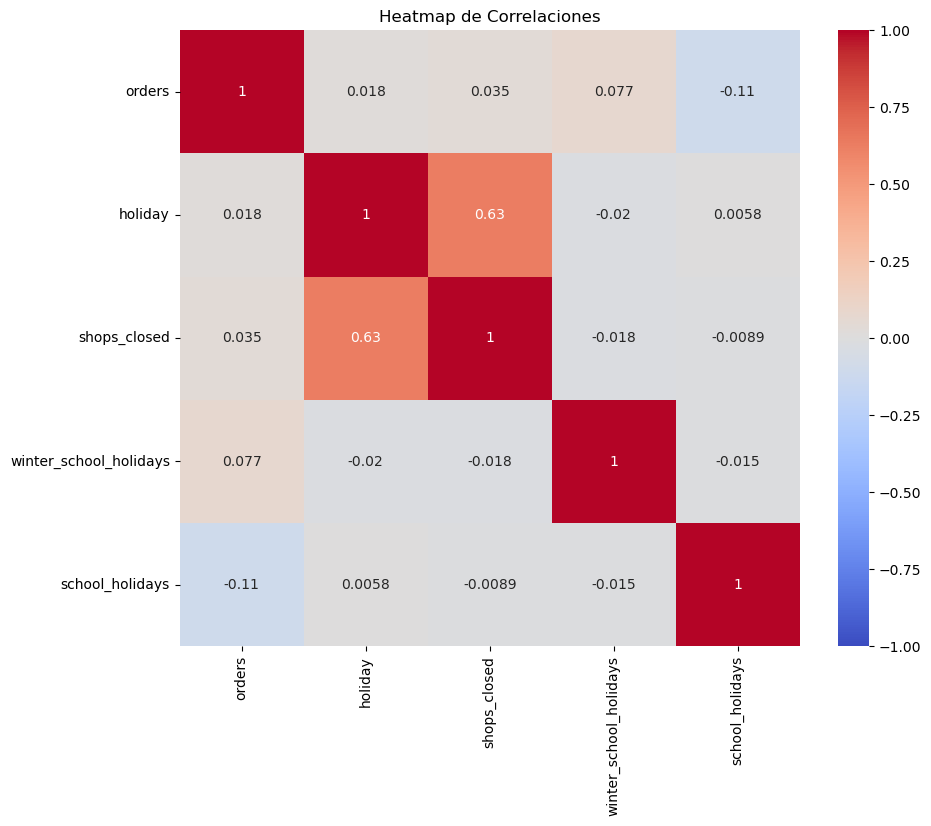

In [237]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [238]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

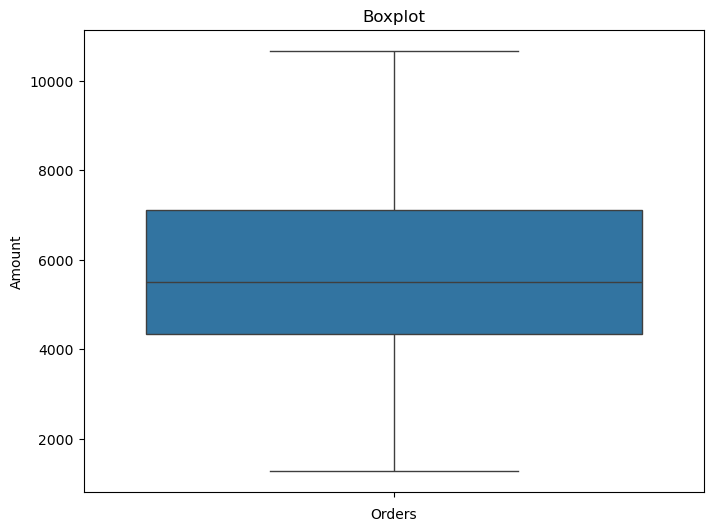

In [239]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

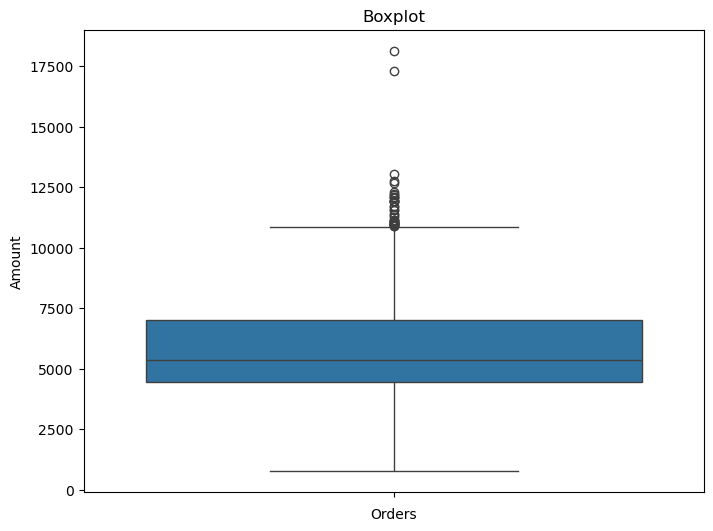

In [240]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

## Análisis de Sucursales y Variables Estacionales

En este análisis, hemos profundizado en la influencia de las sucursales y las estaciones del año en la cantidad de pedidos, realizando varias modificaciones al dataset para obtener insights más claros y útiles.

### Dataset de sucursales
Las sucursales son un factor determinante en las muestras, ya que cada una puede tener características operativas y de demanda diferentes. Para analizar el impacto de las sucursales sobre la variable objetivo (número de órdenes), creamos variables dummies a partir de la columna `warehouse` y calculamos un **heatmap de correlaciones**. Esto nos permitió visualizar qué tan correlacionada está cada sucursal con la cantidad de pedidos. Observamos que existen correlaciones muy altas entre la mayoría de las sucursales, excepto en tres casos: `Budapest_1`, `Prague_2` y `Prague_3`. Esto sugiere que estas sucursales tienen un comportamiento diferente, por lo que las agrupamos bajo una categoría común llamada "other" para reducir la complejidad del modelo y mejorar la generalización.

### Análisis por día de la semana y mes
Para estudiar la distribución de pedidos a lo largo del tiempo, creamos variables para contar los pedidos por día de la semana y por mes. Esto nos permitió identificar patrones temporales en la demanda. Al analizar los datos por semana y mes, visualizamos las tendencias de pedidos a través de gráficos de barras, lo que nos ayudó a comprender mejor las fluctuaciones estacionales y las posibles diferencias en la demanda entre días y meses del año.

### Análisis Estacional
Otra modificación relevante fue la creación de la columna **`Season`**, que clasifica los datos en función de las estaciones del año (primavera, verano, otoño, invierno). Esta información es valiosa porque la demanda de productos puede variar según la estación, especialmente para una empresa de e-commerce de alimentos. Para esto, asignamos la estación correspondiente a cada fecha en función del mes y analizamos su impacto en las órdenes mediante un **heatmap de correlaciones**. Observamos que las estaciones calientes (verano y primavera) tienden a estar más correlacionadas con un mayor número de pedidos, lo que sugiere que la demanda en estas estaciones es más alta.

### Variables meteorológicas y otros factores
Finalmente, analizamos la correlación entre las órdenes y otras variables como la nieve (`snow`), la precipitación (`precipitation`), los feriados (`holiday`) y el cambio en la movilidad (`mov_change`). Sin embargo, la relación con estas variables fue menor, lo que indica que factores como el clima y los feriados pueden no tener un impacto tan directo en las predicciones de pedidos como las características relacionadas con las sucursales o las estaciones del año.

En resumen, hemos realizado un análisis detallado de las sucursales y la estacionalidad, y hemos limpiado y transformado el dataset para destacar las variables que influyen más en la predicción de pedidos. Esto nos ha permitido mejorar la calidad del dataset y enfocarnos en las características que realmente impactan las predicciones.


In [241]:
df_warehouses = df_clean.drop(columns=["holiday", "holiday_name", 'date', "shops_closed", "school_holidays", "winter_school_holidays"])

# Primero agregamos las variables de las actividades de usuario para ver su correlacion

# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_warehouses["user_activity_1"] = pd.merge(df_warehouses, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_warehouses["user_activity_2"] = pd.merge(df_warehouses, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_warehouses[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_22174/4236548369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
/tmp/ipykernel_22174/4236548369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [242]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_warehouses.drop(["warehouse"], axis=1), pd.get_dummies(df_warehouses.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

,orders,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,1671.156748,36898.751048,0,0,0,0,1,0,0
1,6584.0,1671.156748,36898.751048,0,0,0,0,1,0,0
2,7030.0,1671.156748,36898.751048,0,0,0,0,1,0,0
3,6550.0,1671.156748,36898.751048,0,0,0,0,1,0,0
4,6910.0,1671.156748,36898.751048,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7336,6492.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7337,6661.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7338,6843.0,2989.061525,22173.545927,0,1,0,0,0,0,0


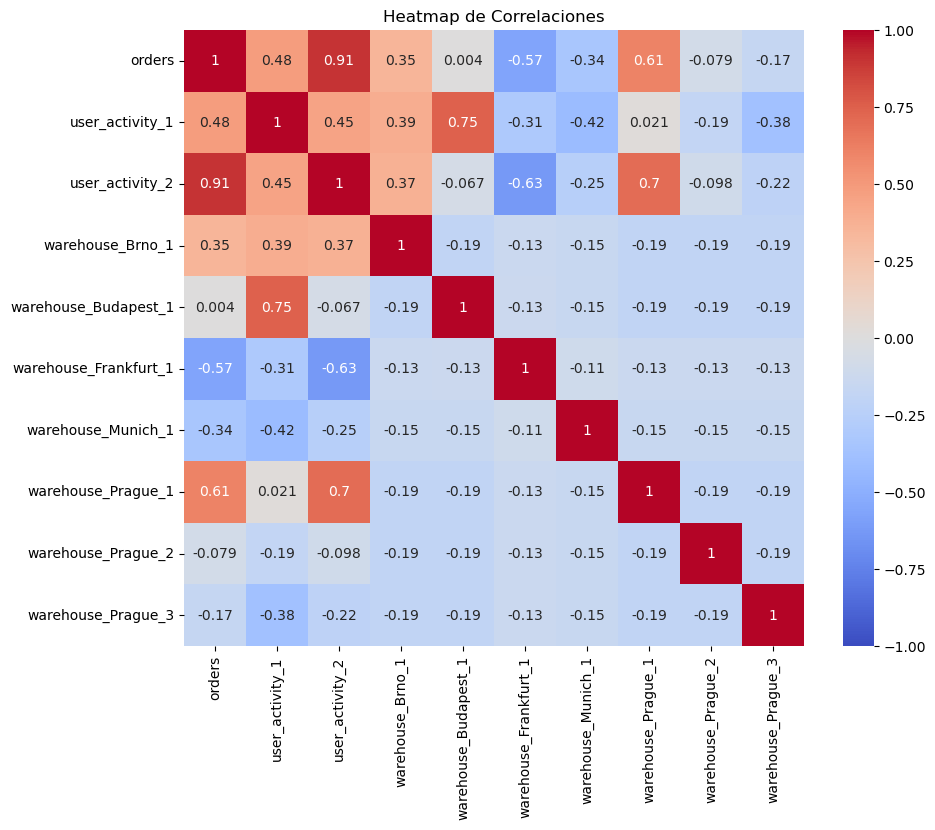

In [243]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en tres (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [244]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [245]:
orders_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
counts_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
orders_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}
counts_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

def sum_orders_by_date(row):
    # pasar la fecha a datetime de pandas
    date = datetime.strptime(row["date"], "%Y-%m-%d")
    # tomar el dia de semana que cayo la fecha
    weekday = date.strftime("%A")
    mounth = date.strftime("%B")
    # sumar el numero de ordenes al dia de semana
    orders_per_weekday[weekday] += int(row["orders"])
    counts_per_weekday[weekday] += 1
    orders_per_mounth[mounth] += int(row["orders"])
    counts_per_mounth[mounth] += 1
    

df.apply(sum_orders_by_date, axis=1)

print(orders_per_weekday)
print(counts_per_weekday)
print(orders_per_mounth)
print(counts_per_mounth)

{'Monday': 5755543, 'Tuesday': 5739699, 'Wednesday': 5760388, 'Thursday': 5890880, 'Friday': 6488411, 'Saturday': 5934540, 'Sunday': 5060697}
{'Monday': 1060, 'Tuesday': 1085, 'Wednesday': 1094, 'Thursday': 1089, 'Friday': 1085, 'Saturday': 1085, 'Sunday': 842}
{'January': 4396433, 'February': 4099071, 'March': 3806561, 'April': 2984340, 'May': 2997021, 'June': 2837141, 'July': 2804372, 'August': 2870946, 'September': 3017584, 'October': 3234653, 'November': 3318637, 'December': 4263399}
{'January': 742, 'February': 694, 'March': 670, 'April': 535, 'May': 556, 'June': 546, 'July': 574, 'August': 580, 'September': 580, 'October': 587, 'November': 574, 'December': 702}


In [246]:
# Crear un DataFrame a partir de los diccionarios
weekdays = [weekday[0:3] for weekday in orders_per_weekday.keys()]
mean_per_weekday = [orders_per_weekday[weekday] / counts_per_weekday[weekday] for weekday in orders_per_weekday.keys()]
mounths = [mounth[0:3] for mounth in orders_per_mounth.keys()]
mean_per_mounth = [orders_per_mounth[mounth] / counts_per_mounth[mounth] for mounth in orders_per_mounth.keys()]

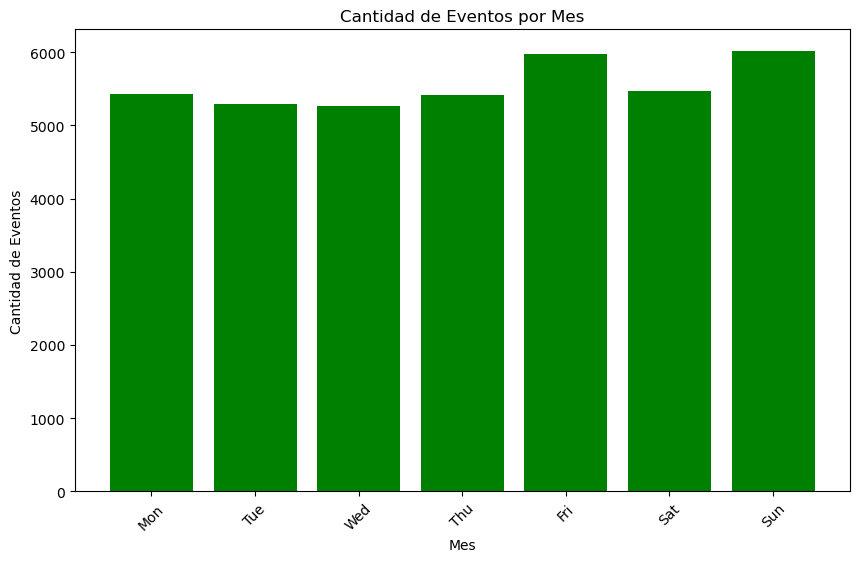

In [247]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays, mean_per_weekday, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

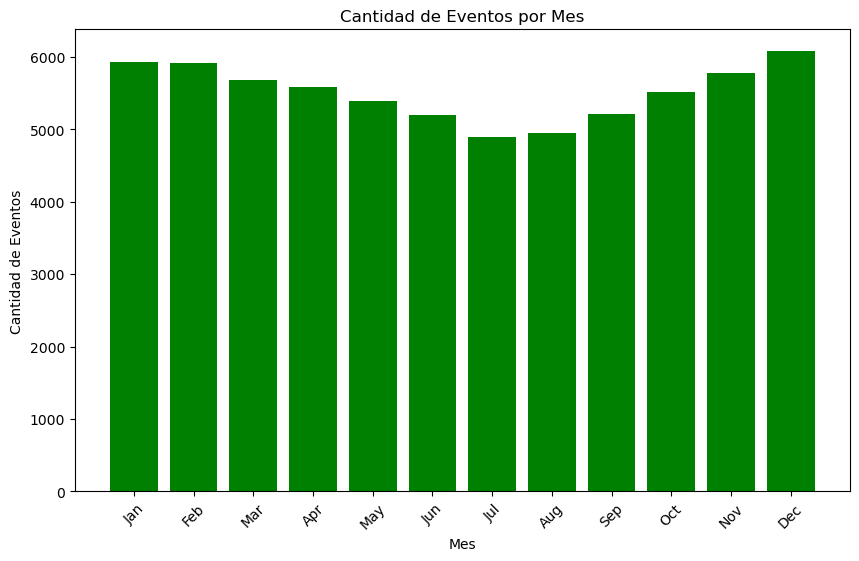

In [248]:
plt.figure(figsize=(10, 6))
plt.bar(mounths, mean_per_mounth, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

In [249]:
df_season = df_clean.copy()
df_season['fecha'] = pd.to_datetime(df['date'])

In [250]:
df_season["Season"] = df_season.fecha.dt.month_name()

In [251]:
def get_season(fecha):
    if fecha in ['December', 'January', 'February']:
        return 'Invierno'
    elif fecha in ['March', 'April', 'May']:
        return 'Primavera'
    elif fecha in ['June', 'July', 'August']:
        return 'Verano'
    elif fecha in ['September', 'October', 'November']:
        return 'Otoño'

In [252]:
df_season['Season'] = df_season.Season.apply(get_season)

In [253]:
df_seasons = pd.concat([df_clean['orders'], pd.get_dummies(df_season.Season).astype('int').add_prefix('Season_')], axis=1)

In [254]:
df_seasons

,orders,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,6895.0,1,0,0,0
1,6584.0,1,0,0,0
2,7030.0,1,0,0,0
3,6550.0,1,0,0,0
4,6910.0,1,0,0,0
...,...,...,...,...,...
7335,6733.0,0,0,1,0
7336,6492.0,0,0,1,0
7337,6661.0,0,0,1,0
7338,6843.0,0,0,1,0


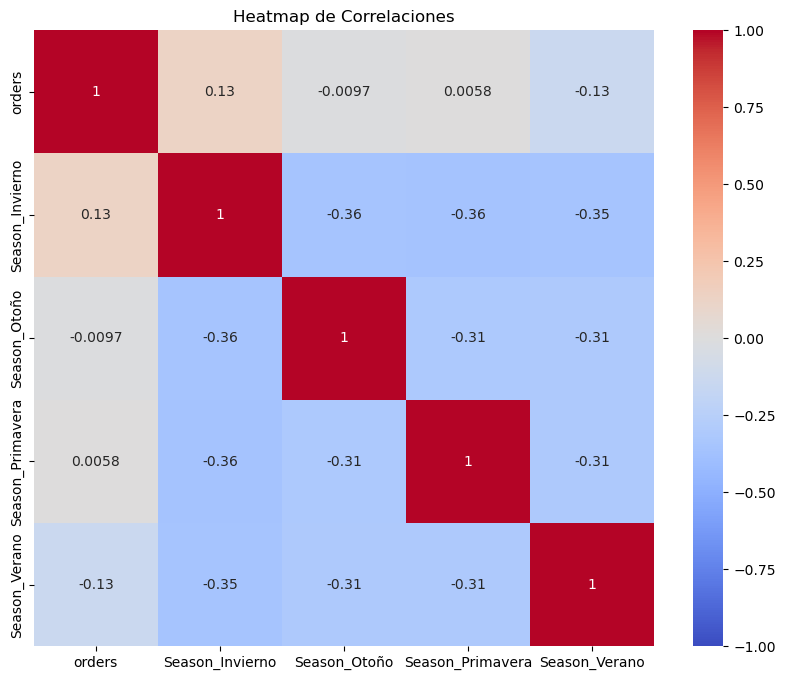

In [255]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_seasons.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [256]:
df_season['Hot'] = df_season.Season.apply(lambda x: 1 if x in ['Verano', 'Primera'] else 0)

In [257]:
df_season

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,fecha,Season,Hot
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,2020-12-05,Invierno,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,2020-12-06,Invierno,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,2020-12-07,Invierno,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,2020-12-08,Invierno,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,2020-12-09,Invierno,0
...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,2024-03-10,Primavera,0
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,2024-03-11,Primavera,0
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,2024-03-12,Primavera,0
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,2024-03-13,Primavera,0


In [258]:
df_season.orders.corr(df_season.Hot)

-0.13284735461473357

In [259]:
df[['orders', 'snow', 'precipitation']].corr()

,orders,snow,precipitation
orders,1.000000,0.093424,0.030428
snow,0.093424,1.000000,0.065120
precipitation,0.030428,0.065120,1.000000


In [260]:
df[['orders', 'holiday', 'mov_change']].corr()

,orders,holiday,mov_change
orders,1.000000,0.018006,-0.040215
holiday,0.018006,1.000000,0.014483
mov_change,-0.040215,0.014483,1.000000


## Conclusiones del Análisis

A partir del análisis realizado, se llegaron a las siguientes conclusiones clave:

- **Sucursales importantes**: Las sucursales clave que impactan en la predicción de pedidos son: 
  - `warehouse_Brno_1`
  - `warehouse_Budapest_1`
  - `warehouse_Frankfurt_1`
  - `warehouse_Munich_1`
  - `warehouse_Prague_1`
  - `warehouse_Prague_2`
  - `warehouse_Prague_3`

- **Actividades de usuario**: Se observó una **alta correlación** entre las actividades de usuario y el número de pedidos. Esto sugiere que las actividades de los usuarios tienen un impacto significativo en las operaciones de las sucursales.

- **Promedio de actividades de usuario por sucursal**: Se calculó el promedio de las actividades de usuario por sucursal para comprender mejor cómo este factor varía entre las diferentes ubicaciones.

- **Estacionalidad**: Los días pertenecientes a la **temporada de calor** (primavera y verano) muestran un aumento en los pedidos, mientras que en **invierno** se encontraron valores más altos en algunas sucursales, lo que resalta la variabilidad estacional.

- **Vacaciones escolares y días festivos**: Se detectó una **alta correlación** entre las vacaciones escolares y el número de pedidos, mientras que los **días festivos** no mostraron una correlación tan significativa.

### Columnas finales del dataset:
- `warehouse_Brno_1` (binaria)
- `warehouse_Budapest_1` (binaria)
- `warehouse_Frankfurt_1` (binaria)
- `warehouse_Munich_1` (binaria)
- `warehouse_Prague_1` (binaria)
- `warehouse_Prague_2` (binaria)
- `warehouse_Prague_3` (binaria)
- Promedio de actividades de usuario por sucursal (numérica)
- `school_holiday` (binaria)
- `Hot_season` (binaria)


## Feature Engineering

A continuación, se detallan las características generadas para la predicción de pedidos:

1. **Actividades de Usuario**:
   - **Promedio de actividad de usuario 1** por sucursal.
   - **Promedio de actividad de usuario 2** por sucursal.
   - **Máximo** y **mínimo** de actividad de usuario por sucursal.

2. **Mean Encoding**:
   - **Promedio de pedidos por sucursal**: Utilizando la codificación por medias para las sucursales.
   - **Promedio de pedidos por sucursal y mes**: Codificación por medias usando la combinación de mes y sucursal.

3. **Codificación de variables categóricas**:
   - Se realizaron transformaciones de las variables **`warehouse`** y **`country`** mediante **one-hot encoding**.
   - Se incluyeron variables de **estacionalidad** (primavera, verano, otoño, invierno).

4. **Variables temporales**:
   - Se añadieron transformaciones de fechas como **seno** y **coseno** para año, mes, semana y día de la semana para capturar la variabilidad estacional y temporal.
   - Variables adicionales como **`year_sin`**, **`month_cos`**, y **`week_cos`** se generaron para representar mejor las relaciones cíclicas.

5. **Generación de grupo temporal**:
   - Se creó un identificador de grupo `group` basado en el año, mes y día de la semana para capturar patrones de pedidos a nivel temporal.

## Preparación de los Datos

- Se separaron los datos en **train** y **validation** en una proporción de 80% y 20%, respectivamente, sin mezclar aleatoriamente para preservar la temporalidad de los datos.
  
- Se generaron las variables mencionadas en el feature engineering y se aplicaron transformaciones para optimizar el modelo.

## Correlaciones

Se realizaron análisis de correlación entre las variables generadas y el número de pedidos. Las características con una correlación mayor a 0.1 fueron seleccionadas para su uso en el modelo. Entre las principales variables seleccionadas se incluyen:

- Actividades de usuario (promedio, máximo, mínimo).
- Promedio de pedidos por sucursal.
- Codificación temporal y estacional.

## Conclusión

El análisis ha permitido identificar las variables más relevantes para la predicción de pedidos, mientras que el feature engineering ha generado nuevas características que capturan la variabilidad temporal y de actividad de los usuarios, esenciales para el modelo de predicción.


In [261]:
df_final = df.drop(["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "blackout", "mov_change", 'id'], axis = 1)
df_final

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,1722.0,32575.0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,1688.0,32507.0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,1696.0,32552.0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,1681.0,32423.0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,1704.0,32410.0
...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,2983.0,27111.0
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,2975.0,27133.0
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,2974.0,27151.0
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,2979.0,27180.0


In [262]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [263]:
df_final = df_final.sort_values(by = "date")

In [264]:
df_final_label = df_final.orders
df_final = df_final.drop(["orders"], axis=1)

# Separando el DataFrame en 80% y 20%
df_final_train, df_final_validation, df_final_train_label, df_final_validation_label = train_test_split(df_final,
                                                    df_final_label, 
                                                    test_size=0.2,
                                                    shuffle=False)



In [265]:
df_final_train_label = df_final_train_label.reset_index().drop(["index"], axis = 1)
df_final_validation_label = df_final_validation_label.reset_index().drop(["index"], axis = 1)
df_final_train = df_final_train.reset_index().drop(["index"], axis = 1)
df_final_validation = df_final_validation.reset_index().drop(["index"], axis = 1)

In [266]:
warehouses = df_final_train.warehouse

In [267]:
# mean user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean()
means_ua1= df_usact1.to_dict()

PROMEDIO_UA1 = df_usact1.mean()

# max user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].max()
max_ua1= df_usact1.to_dict()

# min user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].min()
min_ua1= df_usact1.to_dict()

In [268]:
# user activity 2
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean()
PROMEDIO_UA2 = df_usact1.mean()
means_ua2= df_usact2.to_dict()

# max user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].max()
max_ua2= df_usact2.to_dict()

# min user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].min()
min_ua2= df_usact2.to_dict()

In [269]:
df_mean_encoding_warehouse = pd.concat([df_final_train, df_final_train_label], axis = 1)[["orders", 'warehouse']]
df_mean_encoding_warehouse = df_mean_encoding_warehouse.groupby("warehouse")["orders"].mean()
PROMEDIO_OPW = df_mean_encoding_warehouse.mean()
means_orders_per_warehouse= df_mean_encoding_warehouse.to_dict()

In [270]:
df_final_train

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,NaN,0,0,0,0,1722.0,32575.0
1,Prague_2,2020-12-05,NaN,0,0,0,0,1317.0,18462.0
2,Prague_3,2020-12-05,NaN,0,0,0,0,964.0,17693.0
3,Budapest_1,2020-12-05,NaN,0,0,0,0,3046.0,17840.0
4,Brno_1,2020-12-05,NaN,0,0,0,0,2332.0,27392.0
...,...,...,...,...,...,...,...,...,...
5867,Prague_1,2023-08-06,NaN,0,0,0,0,1657.0,36209.0
5868,Budapest_1,2023-08-06,NaN,0,0,0,0,2962.0,22432.0
5869,Prague_2,2023-08-06,NaN,0,0,0,0,1287.0,21491.0
5870,Prague_3,2023-08-07,NaN,0,0,0,0,950.0,19482.0


In [271]:
df_final_train['year_month_warehouse'] = df_final_train['date'].dt.month.astype(str) + '_' + df_final_train['warehouse']
df_mean_encoding_year_month_warehouse = pd.concat([df_final_train, df_final_train_label], axis = 1)[["orders", 'year_month_warehouse']]
df_mean_encoding_year_month_warehouse = df_mean_encoding_year_month_warehouse.groupby('year_month_warehouse')["orders"].mean()
PROMEDIO_YMW = df_mean_encoding_year_month_warehouse.mean()
means_y_m_w= df_mean_encoding_year_month_warehouse.to_dict()

In [272]:
means_orders_per_warehouse

{'Brno_1': 7009.977366255144,
 'Budapest_1': 5362.533546325879,
 'Frankfurt_1': 1409.5226244343892,
 'Munich_1': 2901.62292358804,
 'Prague_1': 8261.953703703704,
 'Prague_2': 4982.338477366256,
 'Prague_3': 4576.63309352518}

In [273]:
# #Features relacionadas con la user activity
df_final_train["mean_user_activity_1"] = df_final_train.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
# df_final_train["mean_user_activity_2"] = df_final_train.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
# df_final_train["max_user_activity_1"] = df_final_train.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
# df_final_train["max_user_activity_2"] = df_final_train.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
# df_final_train["min_user_activity_1"] = df_final_train.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
# df_final_train["min_user_activity_2"] = df_final_train.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
# df_final_train["product_ua"] = df_final_train["mean_user_activity_1"] * df_final_train["mean_user_activity_2"]


# #Mean encoding
# df_final_train["mean_orders_per_warehouse"] = df_final_train.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
# df_final_train['year_month_warehouse'] = df_final_train['date'].dt.month.astype(str) + '_' + df_final_train['warehouse']
# df_final_train["means_year_month_warehouse"] = df_final_train.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
df_final_train['country'] = df_final_train['warehouse'].map(city_to_country)
df_final_train = pd.concat([df_final_train.drop(["country"], axis=1), pd.get_dummies(df_final_train.country).astype('int').add_prefix('country_')], axis=1)
df_final_train = pd.concat([df_final_train.drop(["warehouse"], axis=1), pd.get_dummies(df_final_train.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_train = df_final_train.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_train['hot_season'] = df_final_train.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
df_final_train['year'] = df_final_train['date'].dt.year
df_final_train['month'] = df_final_train['date'].dt.month
df_final_train['week'] = df_final_train['date'].dt.isocalendar().week
df_final_train['day'] = df_final_train['date'].dt.day
df_final_train['day_of_week'] = df_final_train['date'].dt.dayofweek #numero
# df_final_train['day_of_week'] = df_final_train['date'].dt.day_name() #cadena
df_final_train['year_sin'] = np.sin(2 * np.pi * df_final_train['year'])
#df_final_train['year_cos'] = np.cos(2 * np.pi * df_final_train['year'])
#df_final_train['month_sin'] = np.sin(2 * np.pi * df_final_train['month'] / 12) 
df_final_train['month_cos'] = np.cos(2 * np.pi * df_final_train['month'] / 12)
#df_final_train['week_sin'] = np.sin(2 * np.pi * df_final_train['week'] / 53)
df_final_train['week_cos'] = np.cos(2 * np.pi * df_final_train['week'] / 53)
#df_final_train['day_sin'] = np.sin(2 * np.pi * df_final_train['day'] / 31)
#df_final_train['day_cos'] = np.cos(2 * np.pi * df_final_train['day'] / 31)
#df_final_train['day_of_week_sin'] = np.sin(2 * np.pi * df_final_train['day_of_week'] / 7)
#df_final_train['day_of_week_cos'] = np.cos(2 * np.pi * df_final_train['day_of_week'] / 7)
df_final_train["month_name"] = df_final_train.date.dt.month_name()
df_final_train['season'] = df_final_train.month_name.apply(get_season)
df_final_train = pd.concat([df_final_train, pd.get_dummies(df_final_train.season).astype('int').add_prefix('Season_')], axis=1)
df_final_train['group']=(df_final_train['year']-2020)*48+df_final_train['month']*4+df_final_train['day']//7

#drops
df_final_train = df_final_train.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse'
                                      ], axis = 1)
df_final_train = df_final_train.reset_index().drop(["index"], axis = 1)

df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 5872 non-null   int64  
 1   shops_closed            5872 non-null   int64  
 2   winter_school_holidays  5872 non-null   int64  
 3   school_holidays         5872 non-null   int64  
 4   user_activity_1         5872 non-null   float64
 5   user_activity_2         5872 non-null   float64
 6   mean_user_activity_1    5872 non-null   float64
 7   country_Czech Republic  5872 non-null   int64  
 8   country_Germany         5872 non-null   int64  
 9   country_Hungary         5872 non-null   int64  
 10  warehouse_Brno_1        5872 non-null   int64  
 11  warehouse_Frankfurt_1   5872 non-null   int64  
 12  warehouse_Munich_1      5872 non-null   int64  
 13  warehouse_Prague_1      5872 non-null   int64  
 14  hot_season              5872 non-null   

In [274]:
warehouses_validation = df_final_validation.warehouse

In [275]:
# #Features relacionadas con la user activity
df_final_validation["mean_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
# df_final_validation["mean_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
# df_final_validation["max_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
# df_final_validation["max_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
# df_final_validation["min_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
# df_final_validation["min_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
# df_final_validation["product_ua"] = df_final_validation["mean_user_activity_1"] * df_final_validation["mean_user_activity_2"]


# #Mean encoding
# df_final_validation["mean_orders_per_warehouse"] = df_final_validation.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
# df_final_validation['year_month_warehouse'] = df_final_validation['date'].dt.month.astype(str) + '_' + df_final_validation['warehouse']
# df_final_validation["means_year_month_warehouse"] = df_final_validation.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

#Countries and warehouses
df_final_validation['country'] = df_final_validation['warehouse'].map(city_to_country)
df_final_validation = pd.concat([df_final_validation.drop(["country"], axis=1), pd.get_dummies(df_final_validation.country).astype('int').add_prefix('country_')], axis=1)
df_final_validation = pd.concat([df_final_validation.drop(["warehouse"], axis=1), pd.get_dummies(df_final_validation.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_validation = df_final_validation.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_validation['hot_season'] = df_final_validation.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

#Time
df_final_validation['year'] = df_final_validation['date'].dt.year
df_final_validation['month'] = df_final_validation['date'].dt.month
df_final_validation['week'] = df_final_validation['date'].dt.isocalendar().week
df_final_validation['day'] = df_final_validation['date'].dt.day
df_final_validation['day_of_week'] = df_final_validation['date'].dt.dayofweek #numero
# df_final_validation['day_of_week'] = df_final_validation['date'].dt.day_name() #cadena
df_final_validation['year_sin'] = np.sin(2 * np.pi * df_final_validation['year'])
#df_final_validation['year_cos'] = np.cos(2 * np.pi * df_final_validation['year'])
#df_final_validation['month_sin'] = np.sin(2 * np.pi * df_final_validation['month'] / 12) 
df_final_validation['month_cos'] = np.cos(2 * np.pi * df_final_validation['month'] / 12)
#df_final_validation['week_sin'] = np.sin(2 * np.pi * df_final_validation['week'] / 53)
df_final_validation['week_cos'] = np.cos(2 * np.pi * df_final_validation['week'] / 53)
#df_final_validation['day_sin'] = np.sin(2 * np.pi * df_final_validation['day'] / 31)
#df_final_validation['day_cos'] = np.cos(2 * np.pi * df_final_validation['day'] / 31)
#df_final_validation['day_of_week_sin'] = np.sin(2 * np.pi * df_final_validation['day_of_week'] / 7)
#df_final_validation['day_of_week_cos'] = np.cos(2 * np.pi * df_final_validation['day_of_week'] / 7)
df_final_validation["month_name"] = df_final_validation.date.dt.month_name()
df_final_validation['season'] = df_final_validation.month_name.apply(get_season)
df_final_validation = pd.concat([df_final_validation, pd.get_dummies(df_final_validation.season).astype('int').add_prefix('Season_')], axis=1)
df_final_validation['group']=(df_final_validation['year']-2020)*48+df_final_validation['month']*4+df_final_validation['day']//7

#drops
df_final_validation = df_final_validation.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'user_activity_1', 'user_activity_2'], axis = 1)
df_final_validation = df_final_validation.reset_index().drop(["index"], axis = 1)

df_final_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 1468 non-null   int64  
 1   shops_closed            1468 non-null   int64  
 2   winter_school_holidays  1468 non-null   int64  
 3   school_holidays         1468 non-null   int64  
 4   mean_user_activity_1    1468 non-null   float64
 5   country_Czech Republic  1468 non-null   int64  
 6   country_Germany         1468 non-null   int64  
 7   country_Hungary         1468 non-null   int64  
 8   warehouse_Brno_1        1468 non-null   int64  
 9   warehouse_Frankfurt_1   1468 non-null   int64  
 10  warehouse_Munich_1      1468 non-null   int64  
 11  warehouse_Prague_1      1468 non-null   int64  
 12  hot_season              1468 non-null   int64  
 13  year_sin                1468 non-null   float64
 14  month_cos               1468 non-null   

In [276]:
df_for_corr = pd.concat([df_final_train, df_final_train_label], axis = 1).corr().drop(['user_activity_1', 'user_activity_2'])
df_for_corr.orders = df_for_corr.orders.apply(lambda x: abs(x))
top_15_columns = list(df_for_corr.sort_values(by="orders", ascending=False).orders.head(18).index)
top_15_columns.pop(0)

'orders'

In [277]:
pd.concat([df_final_train, df_final_train_label], axis = 1).corr().orders

holiday                   0.023156
shops_closed              0.033567
winter_school_holidays    0.097041
school_holidays          -0.111471
user_activity_1           0.496189
user_activity_2           0.961500
mean_user_activity_1      0.492349
country_Czech Republic    0.568169
country_Germany          -0.700828
country_Hungary          -0.002044
warehouse_Brno_1          0.354374
warehouse_Frankfurt_1    -0.549241
warehouse_Munich_1       -0.405651
warehouse_Prague_1        0.625266
hot_season               -0.065796
year_sin                  0.042197
month_cos                 0.096162
week_cos                  0.124784
Season_Invierno           0.095153
Season_Otoño             -0.023032
Season_Primavera          0.038605
Season_Verano            -0.114145
group                    -0.045335
orders                    1.000000
Name: orders, dtype: float64

In [278]:
features_orders  = df_for_corr.sort_values(by="orders", ascending=False).orders
best_features = list(features_orders[features_orders > 0.1].index)
best_features.pop(0)

'orders'

In [279]:
best_features

['country_Germany',
 'warehouse_Prague_1',
 'country_Czech Republic',
 'warehouse_Frankfurt_1',
 'mean_user_activity_1',
 'warehouse_Munich_1',
 'warehouse_Brno_1',
 'week_cos',
 'Season_Verano',
 'school_holidays']

In [280]:
df_for_corr.orders

holiday                   0.023156
shops_closed              0.033567
winter_school_holidays    0.097041
school_holidays           0.111471
mean_user_activity_1      0.492349
country_Czech Republic    0.568169
country_Germany           0.700828
country_Hungary           0.002044
warehouse_Brno_1          0.354374
warehouse_Frankfurt_1     0.549241
warehouse_Munich_1        0.405651
warehouse_Prague_1        0.625266
hot_season                0.065796
year_sin                  0.042197
month_cos                 0.096162
week_cos                  0.124784
Season_Invierno           0.095153
Season_Otoño              0.023032
Season_Primavera          0.038605
Season_Verano             0.114145
group                     0.045335
orders                    1.000000
Name: orders, dtype: float64

In [281]:
all_columns = list(df_final_train.columns)

In [282]:
best_features

['country_Germany',
 'warehouse_Prague_1',
 'country_Czech Republic',
 'warehouse_Frankfurt_1',
 'mean_user_activity_1',
 'warehouse_Munich_1',
 'warehouse_Brno_1',
 'week_cos',
 'Season_Verano',
 'school_holidays']

In [283]:
column_order = best_features

In [284]:
df_final_train

,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2,mean_user_activity_1,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,month_cos,week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano,group
0,0,0,0,0,1722.0,32575.0,1673.672840,1,0,0,0,0,0,1,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
1,0,0,0,0,1317.0,18462.0,1303.776749,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
2,0,0,0,0,964.0,17693.0,956.427544,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
3,0,0,0,0,3046.0,17840.0,2989.895634,0,0,1,0,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
4,0,0,0,0,2332.0,27392.0,2324.431070,1,0,0,1,0,0,0,0,-8.073961e-13,1.0,0.889657,1,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,0,1657.0,36209.0,1673.672840,1,0,0,0,0,0,1,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5868,0,0,0,0,2962.0,22432.0,2989.895634,0,0,1,0,0,0,0,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5869,0,0,0,0,1287.0,21491.0,1303.776749,1,0,0,0,0,0,0,1,-6.447061e-13,-0.5,-0.861044,0,0,0,1,176
5870,0,0,0,0,950.0,19482.0,956.427544,1,0,0,0,0,0,0,1,-6.447061e-13,-0.5,-0.794854,0,0,0,1,177


In [285]:
# pred_ua2 = pd.read_csv("pred_ua2.csv")
# df_final_validation["user_activity_2"] = pred_ua222

In [286]:
# Reordenar las columnas del DataFrame según el orden deseado
df_final_train = df_final_train[column_order].round(5)
df_final_validation = df_final_validation[column_order].round(5)

In [287]:
df_final_train.count()

country_Germany           5872
warehouse_Prague_1        5872
country_Czech Republic    5872
warehouse_Frankfurt_1     5872
mean_user_activity_1      5872
warehouse_Munich_1        5872
warehouse_Brno_1          5872
week_cos                  5872
Season_Verano             5872
school_holidays           5872
dtype: int64

In [288]:
df_final_validation

,country_Germany,warehouse_Prague_1,country_Czech Republic,warehouse_Frankfurt_1,mean_user_activity_1,warehouse_Munich_1,warehouse_Brno_1,week_cos,Season_Verano,school_holidays
0,0,0,1,0,1303.77675,0,0,-0.79485,1,0
1,0,0,1,0,2324.43107,0,1,-0.79485,1,0
2,1,0,0,1,852.77149,0,0,-0.79485,1,0
3,0,1,1,0,1673.67284,0,0,-0.79485,1,0
4,0,0,0,0,2989.89563,0,0,-0.79485,1,0
...,...,...,...,...,...,...,...,...,...,...
1463,0,0,1,0,2324.43107,0,1,0.26359,0,0
1464,0,0,1,0,956.42754,0,0,0.26359,0,0
1465,0,1,1,0,1673.67284,0,0,0.26359,0,0
1466,0,0,1,0,1303.77675,0,0,0.26359,0,0


# Informe de Modelo XGBoost

## Selección del Modelo

El modelo seleccionado para la predicción de pedidos fue **XGBoost** (Extreme Gradient Boosting). Esta elección se basó en varias razones relacionadas con el comportamiento de los datos y los requisitos del problema:

### 1. **Eficiencia en Datos Estructurados**:
   XGBoost ha demostrado ser altamente efectivo en la predicción a partir de **datos tabulares estructurados**, como los datos de sucursales, actividades de usuarios y estacionalidad que tenemos en nuestro caso. Su capacidad para manejar grandes volúmenes de datos y producir resultados rápidos fue crucial para este análisis.

### 2. **Manejo de Variables Categóricas**:
   Dado que se utilizaron variables categóricas como las sucursales (`warehouse`) y las estaciones del año, XGBoost maneja muy bien las variables categóricas, ya sea a través de **one-hot encoding** o mediante técnicas como **mean encoding**, que fue utilizada en el proceso de **Feature Engineering**.

### 3. **Robustez frente a la Colinealidad**:
   Las variables seleccionadas para la predicción (actividades de usuario, estacionalidad, sucursales) mostraron una **alta correlación** entre sí. XGBoost es especialmente robusto frente a problemas de **colinealidad** y permite encontrar interacciones complejas entre variables sin que su rendimiento se degrade.

### 4. **Ajuste de Hiperparámetros**:
   La capacidad de **ajustar hiperparámetros** de XGBoost de manera eficiente a través de **GridSearchCV** permitió obtener una combinación de parámetros óptimos para mejorar el rendimiento del modelo. Esto es especialmente importante en problemas donde la precisión de la predicción es clave, como en este caso, para mejorar las estimaciones de pedidos en función de las variables de entrada.

### 5. **Manejo de Estacionalidad y Series Temporales**:
   XGBoost es eficaz en problemas que incluyen **componentes temporales** y estacionales, ya que permite integrar transformaciones como **variables temporales cíclicas** (por ejemplo, `year_sin`, `month_cos`, `week_cos`) y generar **identificadores de grupo temporal** para capturar patrones de estacionalidad, algo relevante en la predicción de pedidos que dependen de la época del año.

### 6. **Capacidad para Detectar Interacciones No Lineales**:
   Las interacciones entre las variables, como las actividades de usuario, las sucursales y las estaciones del año, no siguen patrones lineales simples. XGBoost es capaz de modelar estas interacciones complejas, lo que es esencial para un problema como este, donde las relaciones no lineales entre características afectan directamente el número de pedidos.

## Proceso de Entrenamiento y Evaluación

### Configuración de GridSearchCV

Se utilizó **GridSearchCV** para encontrar la mejor combinación de hiperparámetros, optimizando el rendimiento del modelo. Este proceso permite evaluar varias combinaciones de parámetros, como la tasa de aprendizaje, la profundidad de los árboles y el número de estimadores, para maximizar la precisión del modelo.

```python
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(df_final_train, df_final_train_label)
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')


In [289]:
# Crear el regressor XGBoost
xgb_reg = xgb.XGBRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [2,3, 6, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'n_estimators': [50, 65, 80, 100, 200, 300],
    'colsample_bytree': [0.3, 0.6, 0.7, 1]
}

In [290]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

In [291]:
# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(df_final_train, df_final_train_label)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [2, 3, 6, 9, 11, 13, 15],
                         'n_estimators': [50, 65, 80, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [292]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_



best_model.fit(df_final_train, df_final_train_label)
# Hacer predicciones en el conjunto de prueba
y_pred = np.round(best_model.predict(df_final_validation))

# Evaluar el rendimiento del modelo
mse = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mejor combinación de hiperparámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 65}
Mean Squared Error: 0.16


In [293]:
pred_xgboost = y_pred

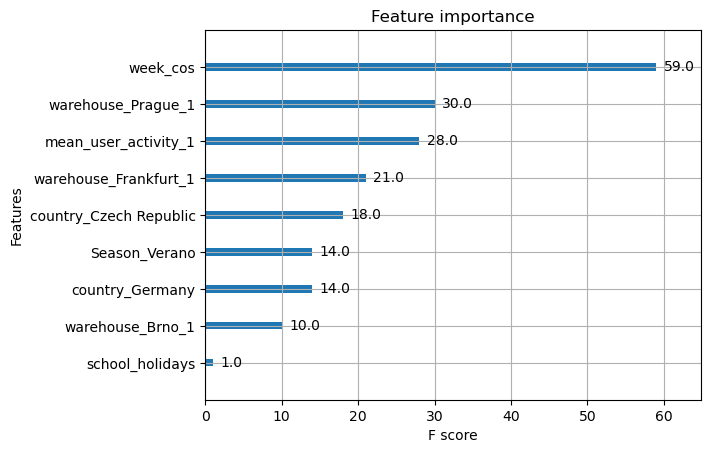

In [294]:
plot_importance(best_model)
plt.show()

In [295]:
list(y_pred)

[4525.0,
 6512.0,
 1308.0,
 7459.0,
 5045.0,
 6512.0,
 1308.0,
 7459.0,
 4525.0,
 5045.0,
 2658.0,
 4208.0,
 7459.0,
 4208.0,
 2658.0,
 6512.0,
 5045.0,
 4525.0,
 1308.0,
 2658.0,
 5045.0,
 7459.0,
 4208.0,
 6512.0,
 1308.0,
 4525.0,
 4208.0,
 2658.0,
 1308.0,
 7459.0,
 5045.0,
 4525.0,
 6512.0,
 6512.0,
 4525.0,
 4208.0,
 7459.0,
 1308.0,
 2658.0,
 5045.0,
 7459.0,
 5045.0,
 6512.0,
 4208.0,
 4525.0,
 1308.0,
 7459.0,
 2658.0,
 4525.0,
 5045.0,
 4208.0,
 6512.0,
 1308.0,
 4208.0,
 4525.0,
 7459.0,
 6512.0,
 5045.0,
 2658.0,
 1308.0,
 4208.0,
 6512.0,
 7459.0,
 4525.0,
 5045.0,
 6512.0,
 2658.0,
 5045.0,
 4208.0,
 4525.0,
 1308.0,
 7459.0,
 6512.0,
 2658.0,
 5045.0,
 4208.0,
 7459.0,
 1308.0,
 4525.0,
 4208.0,
 6512.0,
 2658.0,
 5045.0,
 7459.0,
 1308.0,
 4525.0,
 4525.0,
 7459.0,
 6512.0,
 4208.0,
 1308.0,
 6512.0,
 4525.0,
 7459.0,
 2658.0,
 4208.0,
 5045.0,
 1308.0,
 5045.0,
 7459.0,
 4208.0,
 2658.0,
 4525.0,
 6512.0,
 4525.0,
 6512.0,
 4208.0,
 1308.0,
 2658.0,
 7459.0,
 5045.0,
 

In [296]:
df_final_validation_label

,orders
0,5020.0
1,7319.0
2,1565.0
3,8455.0
4,5607.0
...,...
1463,10777.0
1464,6408.0
1465,11917.0
1466,7140.0


# Informe de Modelo de Redes Neuronales

## Selección del Modelo

El modelo de **Redes Neuronales Artificiales** (ANN) fue seleccionado para la predicción de pedidos debido a varias razones que están alineadas con la naturaleza de los datos y los requisitos del problema:

### 1. **Capacidad para Modelar Relaciones No Lineales**:
   Las **redes neuronales** son altamente eficientes en la captura de **relaciones no lineales** complejas entre las variables. Esto es especialmente relevante para nuestro problema, donde las interacciones entre actividades de usuarios, estaciones del año y sucursales no siguen patrones lineales simples. La estructura de capas ocultas en la red neuronal permite aprender representaciones más complejas de los datos, lo que mejora la predicción.

### 2. **Adaptación a Grandes Volúmenes de Datos**:
   Las redes neuronales son muy buenas para trabajar con **grandes volúmenes de datos** y pueden manejar eficientemente el aumento de características y ejemplos en el dataset. Esto es particularmente importante dada la diversidad de variables que estamos utilizando, como las actividades de usuario, estacionalidad y ubicaciones.

### 3. **Escalabilidad y Flexibilidad**:
   Las redes neuronales, en particular las redes neuronales profundas (como la utilizada en este modelo), tienen la capacidad de adaptarse a diferentes configuraciones y escalarse según las necesidades del problema. Además, es posible agregar más capas y unidades si es necesario, lo que ofrece gran **flexibilidad** en el diseño del modelo.

### 4. **Optimización de Parámetros**:
   La optimización del modelo se realizó mediante el uso del **optimizador Adam**, conocido por su capacidad para converger rápidamente en problemas de aprendizaje supervisado y su eficiencia en el manejo de grandes datos. El **loss function** utilizado fue el **error porcentual absoluto medio** (MAPE), que es adecuado cuando se trata de problemas donde es relevante tener una medida relativa del error.

### 5. **Evaluación de Modelos con Reducción de Sobreajuste**:
   Se implementó un **entrenamiento con validación** (20% de los datos de entrenamiento) para prevenir el sobreajuste y asegurarse de que el modelo sea capaz de generalizar bien a nuevos datos, lo cual es esencial en problemas predictivos donde la precisión en datos no vistos es crucial.

## Proceso de Entrenamiento y Evaluación

### Preprocesamiento de los Datos

El primer paso en la preparación de los datos fue **escalar** las características para asegurar que todas las variables tuvieran el mismo rango y evitar que algunas características dominaran el proceso de optimización. Para ello, se utilizó el **MinMaxScaler** para normalizar los datos de entrada:

```python
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_final_train)
df_validation_scaled = scaler.transform(df_final_validation)


In [297]:
df_final_train

,country_Germany,warehouse_Prague_1,country_Czech Republic,warehouse_Frankfurt_1,mean_user_activity_1,warehouse_Munich_1,warehouse_Brno_1,week_cos,Season_Verano,school_holidays
0,0,1,1,0,1673.67284,0,0,0.88966,0,0
1,0,0,1,0,1303.77675,0,0,0.88966,0,0
2,0,0,1,0,956.42754,0,0,0.88966,0,0
3,0,0,0,0,2989.89563,0,0,0.88966,0,0
4,0,0,1,0,2324.43107,0,1,0.88966,0,0
...,...,...,...,...,...,...,...,...,...,...
5867,0,1,1,0,1673.67284,0,0,-0.86104,1,0
5868,0,0,0,0,2989.89563,0,0,-0.86104,1,0
5869,0,0,1,0,1303.77675,0,0,-0.86104,1,0
5870,0,0,1,0,956.42754,0,0,-0.79485,1,0


In [298]:
# Escalar los datos
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_final_train)
df_validation_scaled = scaler.transform(df_final_validation)

Epoch 1/100


/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


470/470 - 1s - 3ms/step - loss: 90.0739 - val_loss: 61.1371
Epoch 2/100
470/470 - 0s - 469us/step - loss: 34.7880 - val_loss: 19.8410
Epoch 3/100
470/470 - 0s - 495us/step - loss: 15.0355 - val_loss: 15.4222
Epoch 4/100
470/470 - 0s - 489us/step - loss: 12.3446 - val_loss: 15.2563
Epoch 5/100
470/470 - 0s - 476us/step - loss: 11.6568 - val_loss: 14.8577
Epoch 6/100
470/470 - 0s - 542us/step - loss: 11.3481 - val_loss: 13.7025
Epoch 7/100
470/470 - 0s - 535us/step - loss: 11.1205 - val_loss: 12.8945
Epoch 8/100
470/470 - 0s - 575us/step - loss: 10.9898 - val_loss: 12.8157
Epoch 9/100
470/470 - 0s - 658us/step - loss: 10.8552 - val_loss: 13.1910
Epoch 10/100
470/470 - 0s - 535us/step - loss: 10.7357 - val_loss: 11.9768
Epoch 11/100
470/470 - 0s - 464us/step - loss: 10.6688 - val_loss: 13.0769
Epoch 12/100
470/470 - 0s - 489us/step - loss: 10.5911 - val_loss: 12.4943
Epoch 13/100
470/470 - 0s - 532us/step - loss: 10.5329 - val_loss: 11.3334
Epoch 14/100
470/470 - 0s - 505us/step - loss: 1

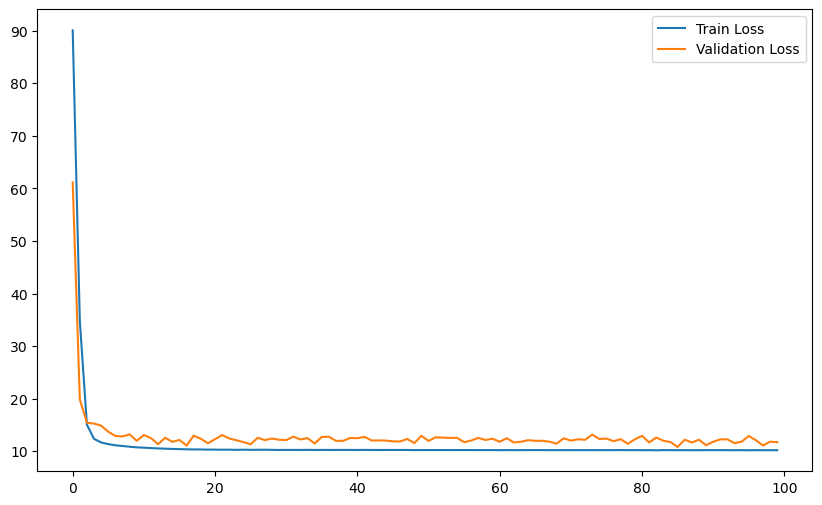

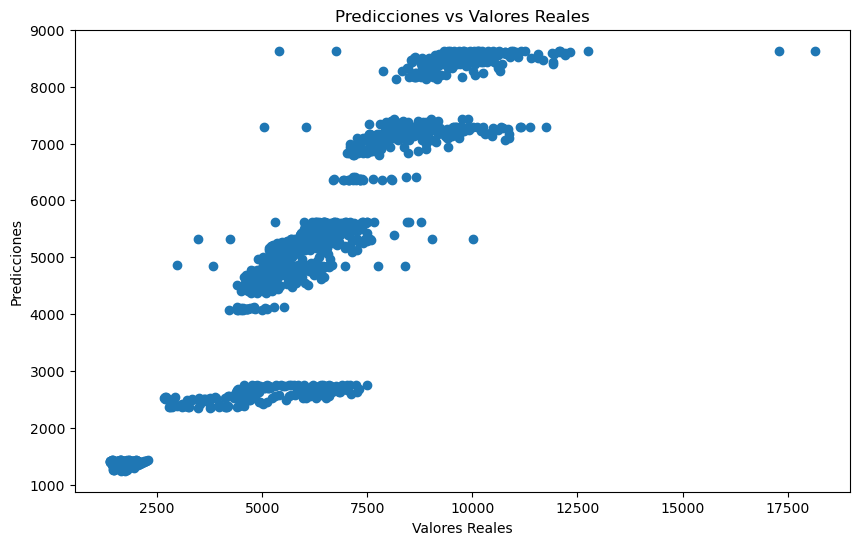

In [299]:
# Crear el modelo de red neuronal
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=df_train_scaled.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))

# Compilar el modelo
model_nn.compile(loss='mean_absolute_percentage_error', optimizer='adam')

# Entrenar el modelo
history = model_nn.fit(df_train_scaled, df_final_train_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model_nn.evaluate(df_validation_scaled, df_final_validation_label, verbose=2)
print(f'Test Loss: {loss}')

# Hacer predicciones
y_pred = model_nn.predict(df_validation_scaled)

# Calcular el error
mape = mean_absolute_percentage_error(df_final_validation_label, y_pred)
print(f'Test MAPE: {mape}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(df_final_validation_label, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Informe de Modelo de Ensamble con Meta-Modelo

## Selección del Modelo

Para este problema de predicción de pedidos, se optó por un enfoque de **ensemble learning**, en el que se combinan múltiples modelos base para mejorar la precisión y robustez del modelo final. Este enfoque es particularmente útil cuando:

- Se desea aprovechar las fortalezas de diferentes algoritmos para abordar diversas características del problema.
- Hay una variedad de patrones complejos en los datos que pueden ser capturados de manera más efectiva por diferentes modelos.

En este caso, se utilizaron **10 modelos base**, que incluyen técnicas tanto lineales como no lineales, y un **meta-modelo** para combinar las predicciones de los modelos base. Los modelos base seleccionados fueron:

1. **XGBoost Regressor** (`XGBRegressor`)
2. **LightGBM Regressor** (`LGBMRegressor`)
3. **Perceptrón Multicapa** (`MLPRegressor`)
4. **Random Forest Regressor** (`RandomForestRegressor`)
5. **Extra Trees Regressor** (`ExtraTreesRegressor`)
6. **Support Vector Regressor** (`SVR`)
7. **Decision Tree Regressor** (`DecisionTreeRegressor`)
8. **AdaBoost Regressor** (`AdaBoostRegressor`)
9. **ElasticNet** (`ElasticNet`)
10. **CatBoost Regressor** (`CatBoostRegressor`)

El **meta-modelo** utilizado para combinar las predicciones de los modelos base fue el **Gradient Boosting Regressor** (`GradientBoostingRegressor`). Este enfoque, también conocido como **stacking**, busca mejorar la predicción final al entrenar un modelo adicional sobre las predicciones de los modelos base.

### ¿Por qué elegir un enfoque de ensemble?

1. **Mejora de la precisión**: Los modelos individuales pueden no capturar todos los aspectos del problema, pero su combinación puede reducir el sesgo y la varianza, mejorando el desempeño general.
2. **Diversidad de modelos**: Al combinar diferentes modelos (árboles, redes neuronales, regresores lineales, etc.), se puede capturar una variedad de patrones en los datos, mejorando la generalización del modelo.
3. **Reducción de overfitting**: Al mezclar múltiples modelos, el riesgo de sobreajuste a los datos de entrenamiento se reduce, ya que se promedian los errores de los modelos base.

## Proceso de Entrenamiento y Evaluación

### Preprocesamiento de los Datos

Los datos fueron escalados utilizando el **StandardScaler**, que normaliza las características para que tengan media cero y desviación estándar igual a uno. Esto es importante para los modelos que son sensibles a la escala de los datos, como **Support Vector Regressor (SVR)** y **Perceptrón Multicapa (MLP)**.

```python
scaler = StandardScaler()
df_final_train = pd.DataFrame(scaler.fit_transform(df_final_train), columns=df_final_train.columns)
df_final_validation = pd.DataFrame(scaler.fit_transform(df_final_validation), columns=df_final_validation.columns)


In [300]:
scaler = StandardScaler()
df_final_train = pd.DataFrame(scaler.fit_transform(df_final_train), columns=df_final_train.columns)
df_final_validation = pd.DataFrame(scaler.fit_transform(df_final_validation), columns=df_final_validation.columns)

In [301]:
df_final_train

,country_Germany,warehouse_Prague_1,country_Czech Republic,warehouse_Frankfurt_1,mean_user_activity_1,warehouse_Munich_1,warehouse_Brno_1,week_cos,Season_Verano,school_holidays
0,-0.465015,2.245251,0.714073,-0.285306,0.032600,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
1,-0.465015,-0.445384,0.714073,-0.285306,-0.442558,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
2,-0.465015,-0.445384,0.714073,-0.285306,-0.888754,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
3,-0.465015,-0.445384,-1.400418,-0.285306,1.723384,-0.337982,-0.445384,1.290365,-0.594921,-0.081769
4,-0.465015,-0.445384,0.714073,-0.285306,0.868546,-0.337982,2.245251,1.290365,-0.594921,-0.081769
...,...,...,...,...,...,...,...,...,...,...
5867,-0.465015,2.245251,0.714073,-0.285306,0.032600,-0.337982,-0.445384,-1.154935,1.680895,-0.081769
5868,-0.465015,-0.445384,-1.400418,-0.285306,1.723384,-0.337982,-0.445384,-1.154935,1.680895,-0.081769
5869,-0.465015,-0.445384,0.714073,-0.285306,-0.442558,-0.337982,-0.445384,-1.154935,1.680895,-0.081769
5870,-0.465015,-0.445384,0.714073,-0.285306,-0.888754,-0.337982,-0.445384,-1.062484,1.680895,-0.081769


In [302]:


model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((df_final_validation.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(df_final_validation)
    test_model2_pred = model2.predict(df_final_validation)
    test_model3_pred = model3.predict(df_final_validation)
    test_model4_pred = model4.predict(df_final_validation)
    test_model5_pred = model5.predict(df_final_validation)
    test_model6_pred = model6.predict(df_final_validation)
    test_model7_pred = model7.predict(df_final_validation)
    test_model8_pred = model8.predict(df_final_validation)
    test_model9_pred = model9.predict(df_final_validation)
    test_model10_pred = model10.predict(df_final_validation)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 10
[LightGBM] [Info] Start training from score 5367.489887


/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052279
0:	learn: 1970.3018564	total: 47.8ms	remaining: 47.7s
1:	learn: 1880.1652779	total: 48.5ms	remaining: 24.2s
2:	learn: 1795.7515215	total: 49ms	remaining: 16.3s
3:	learn: 1717.0595737	total: 49.7ms	remaining: 12.4s
4:	learn: 1641.6750155	total: 50.3ms	remaining: 10s
5:	learn: 1571.3764214	total: 50.8ms	remaining: 8.41s
6:	learn: 1506.6484625	total: 51.3ms	remaining: 7.28s
7:	learn: 1443.1836009	total: 51.9ms	remaining: 6.43s
8:	learn: 1388.6722086	total: 52.2ms	remaining: 5.75s
9:	learn: 1332.6699876	total: 52.8ms	remaining: 5.23s
10:	learn: 1281.4679085	total: 53.4ms	remaining: 4.8s
11:	learn: 1232.3159497	total: 54ms	remaining: 4.44s
12:	learn: 1186.5354761	total: 54.8ms	remaining: 4.16s
13:	learn: 1143.0770489	total: 55.4ms	remaining: 3.9s
14:	learn: 1104.1419332	total: 56ms	remaining: 3.68s
15:	learn: 1066.3613588	total: 56.7ms	remaining: 3.49s
16:	learn: 1031.1177118	total: 57.4ms	remaining: 3.32s
17:	learn: 997.9947387	total: 58ms	remaining: 3.17s
18:

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052279
0:	learn: 1965.7544568	total: 805us	remaining: 805ms
1:	learn: 1876.1498427	total: 1.42ms	remaining: 709ms
2:	learn: 1794.3063037	total: 1.81ms	remaining: 602ms
3:	learn: 1715.1691679	total: 2.43ms	remaining: 605ms
4:	learn: 1641.2506035	total: 2.98ms	remaining: 593ms
5:	learn: 1570.0424322	total: 3.56ms	remaining: 590ms
6:	learn: 1504.6140024	total: 4.14ms	remaining: 588ms
7:	learn: 1441.6053246	total: 4.7ms	remaining: 582ms
8:	learn: 1387.5326666	total: 5.01ms	remaining: 552ms
9:	learn: 1331.9709619	total: 5.58ms	remaining: 553ms
10:	learn: 1281.3331292	total: 6.13ms	remaining: 551ms
11:	learn: 1232.4377171	total: 6.69ms	remaining: 551ms
12:	learn: 1188.4459827	total: 7.13ms	remaining: 541ms
13:	learn: 1145.1121543	total: 7.68ms	remaining: 541ms
14:	learn: 1104.5906991	total: 8.25ms	remaining: 542ms
15:	learn: 1067.3098491	total: 8.78ms	remaining: 540ms
16:	learn: 1033.3574053	total: 9.31ms	remaining: 538ms
17:	learn: 1001.3856978	total: 9.91ms	remaining

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1959.6551104	total: 704us	remaining: 704ms
1:	learn: 1870.7247181	total: 1.32ms	remaining: 657ms
2:	learn: 1787.3964162	total: 1.84ms	remaining: 611ms
3:	learn: 1709.8161845	total: 2.45ms	remaining: 611ms
4:	learn: 1635.9881688	total: 3.08ms	remaining: 614ms
5:	learn: 1565.5381781	total: 3.7ms	remaining: 613ms
6:	learn: 1500.4498828	total: 4.18ms	remaining: 593ms
7:	learn: 1438.2759314	total: 4.75ms	remaining: 589ms
8:	learn: 1384.3736541	total: 5.11ms	remaining: 563ms
9:	learn: 1334.0894612	total: 5.46ms	remaining: 541ms
10:	learn: 1285.5539222	total: 6.04ms	remaining: 543ms
11:	learn: 1236.7225812	total: 6.66ms	remaining: 549ms
12:	learn: 1195.8866868	total: 7.04ms	remaining: 534ms
13:	learn: 1152.9911118	total: 7.61ms	remaining: 536ms
14:	learn: 1114.7462179	total: 8.2ms	remaining: 538ms
15:	learn: 1077.6178397	total: 8.77ms	remaining: 539ms
16:	learn: 1042.9433172	total: 9.39ms	remaining: 543ms
17:	learn: 1011.3234774	total: 9.96ms	remaining:

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1949.7290280	total: 721us	remaining: 721ms
1:	learn: 1860.6095252	total: 1.36ms	remaining: 679ms
2:	learn: 1777.0731201	total: 1.81ms	remaining: 602ms
3:	learn: 1699.2546996	total: 2.41ms	remaining: 600ms
4:	learn: 1624.9934990	total: 2.93ms	remaining: 584ms
5:	learn: 1554.3129831	total: 3.51ms	remaining: 582ms
6:	learn: 1488.9423096	total: 3.96ms	remaining: 561ms
7:	learn: 1426.5074116	total: 4.54ms	remaining: 562ms
8:	learn: 1372.3142841	total: 4.88ms	remaining: 537ms
9:	learn: 1317.2910916	total: 5.48ms	remaining: 543ms
10:	learn: 1266.5765179	total: 6.16ms	remaining: 554ms
11:	learn: 1219.0686947	total: 6.67ms	remaining: 549ms
12:	learn: 1174.8524067	total: 7.28ms	remaining: 553ms
13:	learn: 1131.8244139	total: 7.85ms	remaining: 553ms
14:	learn: 1091.6186024	total: 8.41ms	remaining: 553ms
15:	learn: 1055.3296165	total: 9.02ms	remaining: 555ms
16:	learn: 1021.0709904	total: 9.65ms	remaining: 558ms
17:	learn: 988.5211517	total: 10.2ms	remaining

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1972.0752136	total: 768us	remaining: 767ms
1:	learn: 1882.2348861	total: 1.38ms	remaining: 690ms
2:	learn: 1798.0905851	total: 1.85ms	remaining: 614ms
3:	learn: 1719.5456841	total: 2.45ms	remaining: 609ms
4:	learn: 1644.4748839	total: 3.02ms	remaining: 601ms
5:	learn: 1574.4538609	total: 3.52ms	remaining: 583ms
6:	learn: 1509.9765481	total: 4.18ms	remaining: 593ms
7:	learn: 1446.8932817	total: 5.11ms	remaining: 633ms
8:	learn: 1392.5925834	total: 5.57ms	remaining: 613ms
9:	learn: 1336.9964025	total: 6.41ms	remaining: 634ms
10:	learn: 1286.0462802	total: 7.14ms	remaining: 642ms
11:	learn: 1237.2008550	total: 7.74ms	remaining: 637ms
12:	learn: 1191.6861168	total: 8.41ms	remaining: 639ms
13:	learn: 1149.6270005	total: 9.09ms	remaining: 640ms
14:	learn: 1110.9801767	total: 9.85ms	remaining: 647ms
15:	learn: 1073.4960709	total: 10.5ms	remaining: 646ms
16:	learn: 1038.4399467	total: 11.1ms	remaining: 643ms
17:	learn: 1005.6918648	total: 11.8ms	remainin

In [303]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

mape = mean_absolute_percentage_error(df_final_validation_label, final_pred)
print(f'Final Model MAPE: {mape:.4f}')

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Final Model MAPE: 0.1693


## Submission

In [304]:
# Generamos un dataframe del dataset de entrenamiento
test =  pd.read_csv('test.csv')
test

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2024-03-16,NaN,0,0,0,0,Prague_1_2024-03-16
1,Prague_1,2024-03-17,NaN,0,0,0,0,Prague_1_2024-03-17
2,Prague_1,2024-03-18,NaN,0,0,0,0,Prague_1_2024-03-18
3,Prague_1,2024-03-19,NaN,0,0,0,0,Prague_1_2024-03-19
4,Prague_1,2024-03-20,NaN,0,0,0,0,Prague_1_2024-03-20
...,...,...,...,...,...,...,...,...
392,Budapest_1,2024-05-11,NaN,0,0,0,0,Budapest_1_2024-05-11
393,Budapest_1,2024-05-12,NaN,0,0,0,0,Budapest_1_2024-05-12
394,Budapest_1,2024-05-13,NaN,0,0,0,0,Budapest_1_2024-05-13
395,Budapest_1,2024-05-14,NaN,0,0,0,0,Budapest_1_2024-05-14


In [305]:
test['date'] = pd.to_datetime(test['date'])
test["mean_user_activity_1"] = test.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
test["mean_user_activity_2"] = test.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
test["max_user_activity_1"] = test.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
test["max_user_activity_2"] = test.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
test["min_user_activity_1"] = test.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
test["min_user_activity_2"] = test.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
test["product_ua"] = test["mean_user_activity_1"] * test["mean_user_activity_2"]
# test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))

#Mean encoding
test["mean_orders_per_warehouse"] = test.warehouse.apply(lambda x: means_orders_per_warehouse.get(x, PROMEDIO_OPW))
test['year_month_warehouse'] = test['date'].dt.month.astype(str) + '_' + test['warehouse']
test["means_year_month_warehouse"] = test.year_month_warehouse.apply(lambda x: means_y_m_w.get(x, PROMEDIO_YMW))

test['country'] = test['warehouse'].map(city_to_country)
test = pd.concat([test.drop(["country"], axis=1), pd.get_dummies(test.country).astype('int').add_prefix('country_')], axis=1)
test = pd.concat([test.drop(["warehouse"], axis=1), pd.get_dummies(test.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
test = test.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
test['hot_season'] = test.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.isocalendar().week
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek #numero
# test['day_of_week'] = test['date'].dt.day_name() #cadena
test['year_sin'] = np.sin(2 * np.pi * test['year'])
test['year_cos'] = np.cos(2 * np.pi * test['year'])
test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12) 
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12)
test['week_sin'] = np.sin(2 * np.pi * test['week'] / 53)
test['week_cos'] = np.cos(2 * np.pi * test['week'] / 53)
test['day_sin'] = np.sin(2 * np.pi * test['day'] / 31)
test['day_cos'] = np.cos(2 * np.pi * test['day'] / 31)
test['day_of_week_sin'] = np.sin(2 * np.pi * test['day_of_week'] / 7)
test['day_of_week_cos'] = np.cos(2 * np.pi * test['day_of_week'] / 7)
test["month_name"] = test.date.dt.month_name()
test['season'] = test.month_name.apply(get_season)
test = pd.concat([test, pd.get_dummies(test.season).astype('int').add_prefix('Season_')], axis=1) # tiene solo primavera
test['Season_Invierno'] = 0
test['Season_Verano'] = 0

test['group']=(test['year']-2020)*48+test['month']*4+test['day']//7

test = test.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'year_month_warehouse'], axis = 1)
test = test.reset_index().drop(["index"], axis = 1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     397 non-null    int64  
 1   shops_closed                397 non-null    int64  
 2   winter_school_holidays      397 non-null    int64  
 3   school_holidays             397 non-null    int64  
 4   id                          397 non-null    object 
 5   mean_user_activity_1        397 non-null    float64
 6   mean_user_activity_2        397 non-null    float64
 7   max_user_activity_1         397 non-null    float64
 8   max_user_activity_2         397 non-null    float64
 9   min_user_activity_1         397 non-null    float64
 10  min_user_activity_2         397 non-null    float64
 11  product_ua                  397 non-null    float64
 12  mean_orders_per_warehouse   397 non-null    float64
 13  means_year_month_warehouse  397 non

In [306]:
ids = test.id
test = test.drop(["id"], axis=1)

In [307]:
df_final_train.columns

Index(['country_Germany', 'warehouse_Prague_1', 'country_Czech Republic',
       'warehouse_Frankfurt_1', 'mean_user_activity_1', 'warehouse_Munich_1',
       'warehouse_Brno_1', 'week_cos', 'Season_Verano', 'school_holidays'],
      dtype='object')

In [308]:
test = test[df_final_train.columns]

In [309]:
test

,country_Germany,warehouse_Prague_1,country_Czech Republic,warehouse_Frankfurt_1,mean_user_activity_1,warehouse_Munich_1,warehouse_Brno_1,week_cos,Season_Verano,school_holidays
0,0,1,1,0,1673.672840,0,0,0.263587,0,0
1,0,1,1,0,1673.672840,0,0,0.263587,0,0
2,0,1,1,0,1673.672840,0,0,0.147647,0,0
3,0,1,1,0,1673.672840,0,0,0.147647,0,0
4,0,1,1,0,1673.672840,0,0,0.147647,0,0
...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,2989.895634,0,0,-0.630088,0,0
393,0,0,0,0,2989.895634,0,0,-0.630088,0,0
394,0,0,0,0,2989.895634,0,0,-0.717507,0,0
395,0,0,0,0,2989.895634,0,0,-0.717507,0,0


In [310]:
model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((test.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(test)
    test_model2_pred = model2.predict(test)
    test_model3_pred = model3.predict(test)
    test_model4_pred = model4.predict(test)
    test_model5_pred = model5.predict(test)
    test_model6_pred = model6.predict(test)
    test_model7_pred = model7.predict(test)
    test_model8_pred = model8.predict(test)
    test_model9_pred = model9.predict(test)
    test_model10_pred = model10.predict(test)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 10
[LightGBM] [Info] Start training from score 5367.489887


/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052279
0:	learn: 1970.3018564	total: 714us	remaining: 714ms
1:	learn: 1880.1652779	total: 1.28ms	remaining: 641ms
2:	learn: 1795.7515215	total: 1.76ms	remaining: 584ms
3:	learn: 1717.0595737	total: 2.33ms	remaining: 581ms
4:	learn: 1641.6750155	total: 2.89ms	remaining: 575ms
5:	learn: 1571.3764214	total: 3.33ms	remaining: 552ms
6:	learn: 1506.6484625	total: 3.9ms	remaining: 553ms
7:	learn: 1443.1836009	total: 4.46ms	remaining: 554ms
8:	learn: 1388.6722086	total: 4.82ms	remaining: 530ms
9:	learn: 1332.6699876	total: 5.39ms	remaining: 533ms
10:	learn: 1281.4679085	total: 5.98ms	remaining: 538ms
11:	learn: 1232.3159497	total: 6.55ms	remaining: 539ms
12:	learn: 1186.5354761	total: 7.13ms	remaining: 541ms
13:	learn: 1143.0770489	total: 7.76ms	remaining: 547ms
14:	learn: 1104.1419332	total: 8.35ms	remaining: 549ms
15:	learn: 1066.3613588	total: 8.91ms	remaining: 548ms
16:	learn: 1031.1177118	total: 9.47ms	remaining: 548ms
17:	learn: 997.9947387	total: 10ms	remaining: 5

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052279
0:	learn: 1965.7544568	total: 700us	remaining: 700ms
1:	learn: 1876.1498427	total: 1.34ms	remaining: 668ms
2:	learn: 1794.3063037	total: 1.84ms	remaining: 610ms
3:	learn: 1715.1691679	total: 2.43ms	remaining: 605ms
4:	learn: 1641.2506035	total: 2.98ms	remaining: 593ms
5:	learn: 1570.0424322	total: 3.52ms	remaining: 583ms
6:	learn: 1504.6140024	total: 4.07ms	remaining: 578ms
7:	learn: 1441.6053246	total: 4.59ms	remaining: 570ms
8:	learn: 1387.5326666	total: 4.91ms	remaining: 541ms
9:	learn: 1331.9709619	total: 5.47ms	remaining: 542ms
10:	learn: 1281.3331292	total: 6.04ms	remaining: 543ms
11:	learn: 1232.4377171	total: 6.62ms	remaining: 545ms
12:	learn: 1188.4459827	total: 7.08ms	remaining: 538ms
13:	learn: 1145.1121543	total: 7.62ms	remaining: 537ms
14:	learn: 1104.5906991	total: 8.27ms	remaining: 543ms
15:	learn: 1067.3098491	total: 8.83ms	remaining: 543ms
16:	learn: 1033.3574053	total: 9.37ms	remaining: 542ms
17:	learn: 1001.3856978	total: 9.96ms	remainin

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1959.6551104	total: 749us	remaining: 749ms
1:	learn: 1870.7247181	total: 1.34ms	remaining: 667ms
2:	learn: 1787.3964162	total: 1.81ms	remaining: 603ms
3:	learn: 1709.8161845	total: 2.44ms	remaining: 609ms
4:	learn: 1635.9881688	total: 2.99ms	remaining: 594ms
5:	learn: 1565.5381781	total: 3.59ms	remaining: 595ms
6:	learn: 1500.4498828	total: 4.04ms	remaining: 574ms
7:	learn: 1438.2759314	total: 4.58ms	remaining: 568ms
8:	learn: 1384.3736541	total: 4.92ms	remaining: 542ms
9:	learn: 1334.0894612	total: 5.28ms	remaining: 523ms
10:	learn: 1285.5539222	total: 5.94ms	remaining: 534ms
11:	learn: 1236.7225812	total: 6.5ms	remaining: 535ms
12:	learn: 1195.8866868	total: 6.83ms	remaining: 518ms
13:	learn: 1152.9911118	total: 7.38ms	remaining: 520ms
14:	learn: 1114.7462179	total: 7.99ms	remaining: 524ms
15:	learn: 1077.6178397	total: 8.62ms	remaining: 530ms
16:	learn: 1042.9433172	total: 9.26ms	remaining: 536ms
17:	learn: 1011.3234774	total: 9.87ms	remaining

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1949.7290280	total: 748us	remaining: 748ms
1:	learn: 1860.6095252	total: 1.32ms	remaining: 658ms
2:	learn: 1777.0731201	total: 1.8ms	remaining: 597ms
3:	learn: 1699.2546996	total: 2.38ms	remaining: 594ms
4:	learn: 1624.9934990	total: 2.95ms	remaining: 588ms
5:	learn: 1554.3129831	total: 3.5ms	remaining: 580ms
6:	learn: 1488.9423096	total: 3.92ms	remaining: 557ms
7:	learn: 1426.5074116	total: 4.46ms	remaining: 553ms
8:	learn: 1372.3142841	total: 4.79ms	remaining: 527ms
9:	learn: 1317.2910916	total: 5.39ms	remaining: 533ms
10:	learn: 1266.5765179	total: 5.95ms	remaining: 535ms
11:	learn: 1219.0686947	total: 6.42ms	remaining: 528ms
12:	learn: 1174.8524067	total: 7.03ms	remaining: 534ms
13:	learn: 1131.8244139	total: 7.58ms	remaining: 534ms
14:	learn: 1091.6186024	total: 8.17ms	remaining: 537ms
15:	learn: 1055.3296165	total: 8.73ms	remaining: 537ms
16:	learn: 1021.0709904	total: 9.33ms	remaining: 540ms
17:	learn: 988.5211517	total: 9.88ms	remaining: 

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Learning rate set to 0.052281
0:	learn: 1972.0752136	total: 707us	remaining: 707ms
1:	learn: 1882.2348861	total: 1.34ms	remaining: 668ms
2:	learn: 1798.0905851	total: 1.84ms	remaining: 611ms
3:	learn: 1719.5456841	total: 2.42ms	remaining: 602ms
4:	learn: 1644.4748839	total: 3ms	remaining: 597ms
5:	learn: 1574.4538609	total: 3.48ms	remaining: 576ms
6:	learn: 1509.9765481	total: 4.09ms	remaining: 580ms
7:	learn: 1446.8932817	total: 4.69ms	remaining: 582ms
8:	learn: 1392.5925834	total: 5.04ms	remaining: 555ms
9:	learn: 1336.9964025	total: 5.63ms	remaining: 558ms
10:	learn: 1286.0462802	total: 6.27ms	remaining: 564ms
11:	learn: 1237.2008550	total: 6.83ms	remaining: 562ms
12:	learn: 1191.6861168	total: 7.38ms	remaining: 560ms
13:	learn: 1149.6270005	total: 7.92ms	remaining: 558ms
14:	learn: 1110.9801767	total: 8.49ms	remaining: 557ms
15:	learn: 1073.4960709	total: 9.03ms	remaining: 555ms
16:	learn: 1038.4399467	total: 9.58ms	remaining: 554ms
17:	learn: 1005.6918648	total: 10.2ms	remaining: 

In [311]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [312]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [313]:
# Redes Neuronales
test_scaled = scaler.transform(test)
final_pred = [value[0] for value in model_nn.predict(test_scaled)]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


In [314]:
list(final_pred)

[10833.223,
 10833.223,
 10698.632,
 10698.632,
 10698.632,
 10698.632,
 10698.632,
 10698.632,
 10698.632,
 10561.635,
 10561.635,
 10561.635,
 10561.635,
 10561.635,
 10561.635,
 10561.635,
 10424.154,
 10424.154,
 10424.154,
 10424.154,
 10424.154,
 10424.154,
 10424.154,
 10288.122,
 10288.122,
 10288.122,
 10288.122,
 10288.122,
 10288.122,
 10288.122,
 10155.445,
 10155.445,
 10155.445,
 10155.445,
 10155.445,
 10155.445,
 10155.445,
 10027.944,
 10027.944,
 10027.944,
 10027.944,
 10027.944,
 10027.944,
 10027.944,
 9907.445,
 9907.445,
 9907.445,
 9907.445,
 9907.445,
 9907.445,
 9907.445,
 9795.649,
 9795.649,
 9795.649,
 9795.649,
 9795.649,
 9795.649,
 9795.649,
 9694.127,
 9694.127,
 9694.127,
 7226.0537,
 7226.0537,
 7091.349,
 7091.349,
 7091.349,
 7091.349,
 7091.349,
 7091.349,
 7091.349,
 6954.237,
 6954.237,
 6954.237,
 6954.237,
 6954.237,
 6954.237,
 6954.237,
 6816.6416,
 6816.6416,
 6816.6416,
 6816.6416,
 6816.6416,
 6816.6416,
 6816.6416,
 6680.4946,
 6680.4946,

In [315]:
sub = pd.DataFrame({
    'id': ids,
    'orders': final_pred
})

In [316]:
sub

,id,orders
0,Prague_1_2024-03-16,10833.222656
1,Prague_1_2024-03-17,10833.222656
2,Prague_1_2024-03-18,10698.631836
3,Prague_1_2024-03-19,10698.631836
4,Prague_1_2024-03-20,10698.631836
...,...,...
392,Budapest_1_2024-05-11,3102.396484
393,Budapest_1_2024-05-12,3102.396484
394,Budapest_1_2024-05-13,3000.850098
395,Budapest_1_2024-05-14,3000.850098


In [317]:
# Escribir el DataFrame a un archivo CSV
sub.to_csv('submission_nn.csv', index=False)
